# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import NearMiss

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
# Your code here
data = pd.read_csv("kaggle_data.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


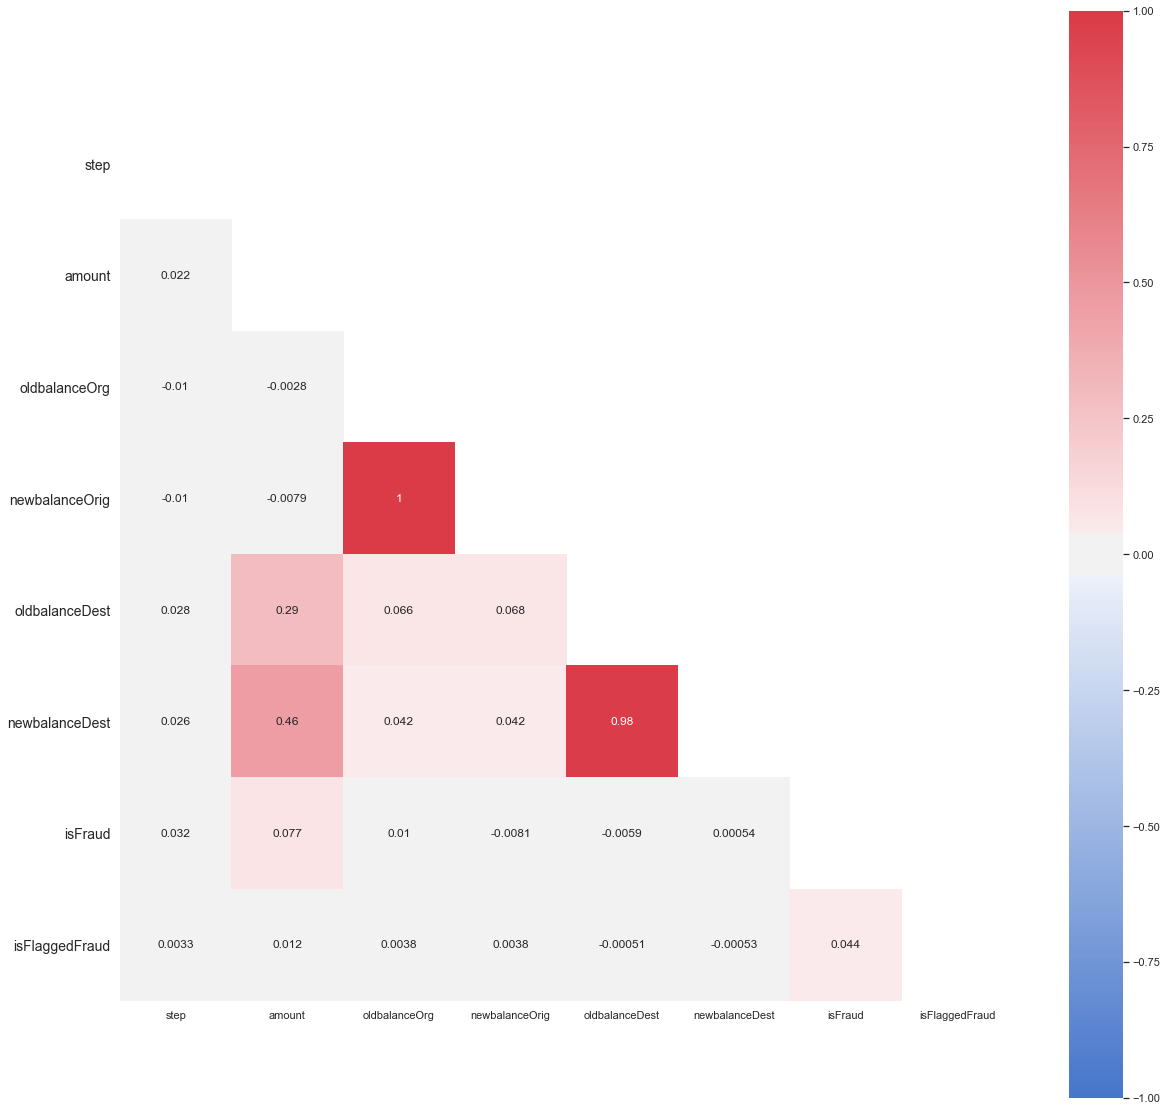

In [5]:
# Your code here
sns.set(style="white")
    
# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,20))

# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors

# Plot the heatmap
g = sns.heatmap(data.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 14)
plt.show()

In [6]:
data[data.isFraud == True].type.value_counts(), data[data.isFraud == False].type.value_counts()

(CASH_OUT    4116
 TRANSFER    4097
 Name: type, dtype: int64, CASH_OUT    2233384
 PAYMENT     2151495
 CASH_IN     1399284
 TRANSFER     528812
 DEBIT         41432
 Name: type, dtype: int64)

In [7]:
# We can see a big difference between types when transaction is fraud or not. 

### What is the distribution of the outcome? 

Number of isFraud values: 0.129248881917699%, and false 99.87091795518198%


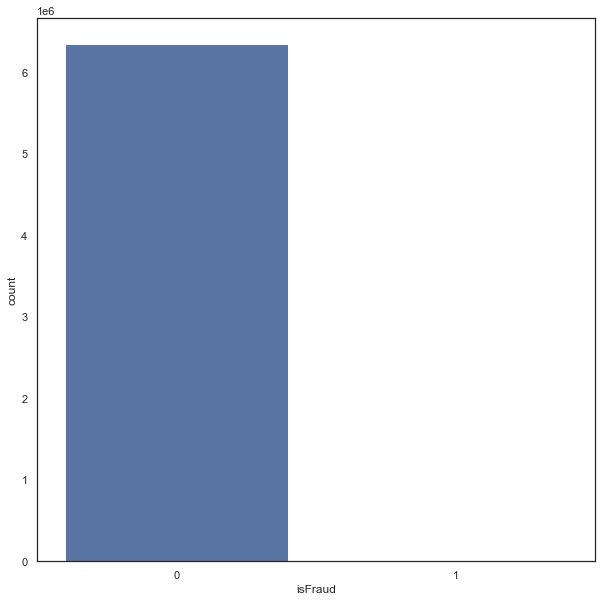

In [8]:
# Your response here

# Calculate isFraud target column in percentage
per_cent_false = (data.isFraud.value_counts()[0] * 100) / len(data.isFraud)
per_cent_true = (data.isFraud.value_counts()[1] * 100) / data.isFraud.value_counts()[0]

# Show distribution of outcome
plt.figure(figsize=(10,10))
ax = sns.countplot(data.isFraud)

print(f"Number of isFraud values: {per_cent_true}%, and false {per_cent_false}%")

In [9]:
"""
Insights:

We can see a very big imbalanced data. Almost 99.87% of transactions are not fraud. 
Type is also imbalanced, there is only fraud on CASH_OUT and TRANFER transactions.
There is a small correlation between fraud and amount (we asume when amount is big, there are more fraud).
"""

'\nInsights:\n\nWe can see a very big imbalanced data. Almost 99.87% of transactions are not fraud. \nType is also imbalanced, there is only fraud on CASH_OUT and TRANFER transactions.\nThere is a small correlation between fraud and amount (we asume when amount is big, there are more fraud).\n'

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [10]:
# Your code here

# Removing columns with no useful information. Name is unique for each transaction, as the nameOrig. 

columns_remove = ["nameOrig", "nameDest"]
data.drop(columns=columns_remove, axis=1, inplace=True)

In [11]:
data.dropna(how="any", inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_dummy = pd.get_dummies(data, drop_first=True)

In [14]:
data_dummy.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [15]:
# Your code here

# Target column
y = data_dummy["isFraud"]

# Feature columnns
X = data_dummy.drop(columns="isFraud")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

transaction_model = LogisticRegression()

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = transaction_model.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[5079365,    4121],
        [   3665,    2945]]), 0.9984703628379504)

In [19]:
# We got a pretty good accuracy, but I asume we got overfitting here as isFraud column was very imbalanced (99.8% vs 0.2%)

In [20]:
# Let's balance isFraud and perform run the logistic regression again.

nr = NearMiss()
X_res, y_res = nr.fit_sample(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.8, random_state=42)
y_pred = transaction_model.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([[6553,   20],
        [  47, 6521]]), 0.9949014534662507)

In [22]:
# Wow, got pretty same results. Very good model!

### Now pick a model of your choice and evaluate its accuracy.

In [23]:
# Your code here

# We are going to run the model with data already balanced.

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [24]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
y_pred = knn_model.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[6494,   79],
        [ 176, 6392]]), 0.9805950840879689)

### Which model worked better and how do you know?

In [26]:
# Your response here

# I would say LogisticRegression worked better not just because of the accuracy (almost the same) but because it has lower false negatives.